In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
df = pd.read_csv("../data/processed/cleaned_sampled_df.csv")

In [11]:
df.head(5)

,annuity_780A,cntpmts24_3658933L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,empl_employedtotal_800L,WEEK_NUM,target
0,6747.2000,0.0,28000.0,0.0,-5.0,Missing,87,0
1,2206.6000,10.0,40000.0,3000.0,-5.0,Missing,71,0
2,3342.4001,15.0,56000.0,0.0,-5.0,Missing,87,0
3,3141.4001,12.0,20000.0,0.0,-6.0,Missing,30,0
4,6327.6000,14.0,40000.0,0.0,-8.0,Missing,90,0


In [12]:
df.shape

(50000, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   annuity_780A               50000 non-null  float64
 1   cntpmts24_3658933L         50000 non-null  float64
 2   maininc_215A               50000 non-null  float64
 3   downpmt_116A               50000 non-null  float64
 4   avgdbddpdlast24m_3658932P  50000 non-null  float64
 5   empl_employedtotal_800L    50000 non-null  object 
 6   WEEK_NUM                   50000 non-null  int64  
 7   target                     50000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 3.1+ MB


Before we train and test our model. Lets identify categorical objects in our data that could be used to convert into numeric identifiers so we could train our model.

In [16]:
df_encoded = pd.get_dummies(df, columns = ["empl_employedtotal_800L"], prefix=["reported_employment_date"])
df_encoded = df_encoded.astype(int)

In [17]:
df_encoded.head(10)

,annuity_780A,cntpmts24_3658933L,maininc_215A,downpmt_116A,avgdbddpdlast24m_3658932P,WEEK_NUM,target,reported_employment_date_Missing,reported_employment_date_Present
0,6747,0,28000,0,-5,87,0,1,0
1,2206,10,40000,3000,-5,71,0,1,0
2,3342,15,56000,0,-5,87,0,1,0
3,3141,12,20000,0,-6,30,0,1,0
4,6327,14,40000,0,-8,90,0,1,0
5,2464,10,40000,0,-5,50,0,0,1
6,1692,10,90000,0,260,61,0,1,0
7,3048,25,40000,0,-7,85,0,1,0
8,4861,8,20000,0,-23,42,0,1,0
9,1631,4,60000,0,-2,20,0,0,1


In [18]:
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999823     1.000000  0.999829      0.999912      0.999829
recall         1.000000     0.994371  0.999829      0.997186      0.999829
f1-score       0.999912     0.997178  0.999829      0.998545      0.999828
support    33934.000000  1066.000000  0.999829  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33934     0]
 [    6  1060]]

Test Result:
Accuracy Score: 93.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.972147    0.042328     0.937      0.507238       0.94574
recall         0.962742    0.056338     0.937      0.509540       0.93700
f1-score       0.967422    0.048338     0.937      0.507880       0.94132
support    145

In [23]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})
Train Result:
Accuracy Score: 97.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.974566     0.887255  0.974057      0.930910      0.971907
recall         0.999322     0.169794  0.974057      0.584558      0.974057
f1-score       0.986789     0.285039  0.974057      0.635914      0.965416
support    33934.000000  1066.000000  0.974057  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33911    23]
 [  885   181]]

Test Result:
Accuracy Score: 96.63%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.971954    0.083333  0.966

In [24]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999823     1.000000  0.999829      0.999912      0.999829
recall         1.000000     0.994371  0.999829      0.997186      0.999829
f1-score       0.999912     0.997178  0.999829      0.998545      0.999828
support    33934.000000  1066.000000  0.999829  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33934     0]
 [    6  1060]]

Test Result:
Accuracy Score: 96.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.971736    0.088235  0.969733      0.529986      0.946645
recall         0.997873    0.007042  0.969733      0.502458      0.969733
f1-score       0.984631    0.013043  0.969733      0.498837      0.957038
support    145

In [26]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
460 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
364 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jacob/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_par

Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False})


In [27]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999823     1.000000  0.999829      0.999912      0.999829
recall         1.000000     0.994371  0.999829      0.997186      0.999829
f1-score       0.999912     0.997178  0.999829      0.998545      0.999828
support    33934.000000  1066.000000  0.999829  35000.000000  35000.000000
_______________________________________________
Confusion Matrix: 
 [[33934     0]
 [    6  1060]]

Test Result:
Accuracy Score: 96.59%
_______________________________________________
CLASSIFICATION REPORT:
                      0           1  accuracy     macro avg  weighted avg
precision      0.971691    0.043011  0.965933      0.507351      0.945317
recall         0.993893    0.009390  0.965933      0.501641      0.965933
f1-score       0.982667    0.015414  0.965933      0.499041      0.955197
support    145

Accuracy: 0.9657333333333333
Best parameters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


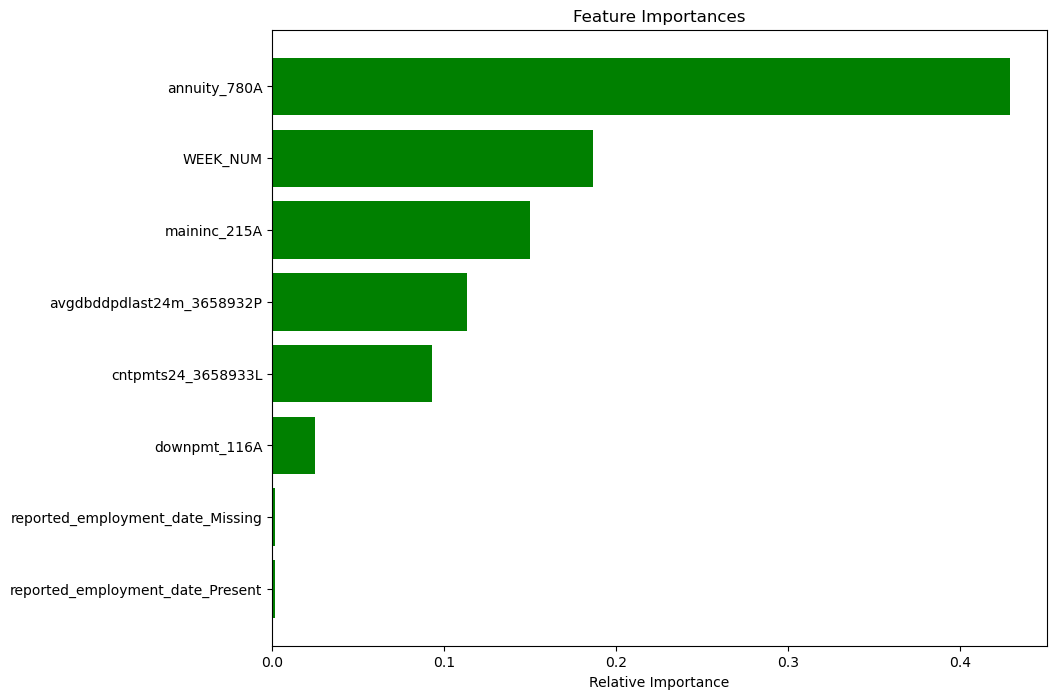

In [28]:
# Predict on the test set using the best model
best_model = rf_cv.best_estimator_
y_pred = best_model.predict(X_test)

# Print accuracy and best parameters
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Best parameters:", rf_cv.best_params_)

# Visualize feature importances
features = X.columns
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()